# Visualization of Loan Thresholds For FICO Data

In this notebook, we visualize the positions of the loan thresholds resulting from bank Profit Maximization under various Fairness Criteria. We compare this value with the threshold on the disadvantaged population experiencing Improvement or Decline.

In [1]:
! python3 -V

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import all of our files
import sys
sys.path.append('../')

import fico
import distribution_to_loans_outcomes as dlo

DATA_DIR = '../data/'

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set plotting parameters
sns.set_context("talk")
sns.set_style("white")

# this needs to be here so we can edit figures later
plt.rcParams['pdf.fonttype'] = 42

# 0. Load and parse data

In [24]:
all_cdfs, performance, totals = fico.get_FICO_data(data_dir="/home/mackenzie/git_repositories/delayedimpact/data/")

original v.index from data_pair in for loop
RangeIndex(start=0, stop=198, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
IN CONVERT ONE FUNC IN CONVERT PERCENTILES
this is the x score we are looking at:
0
<class 'int'>
after x type conversion:
<class 'float'>
<class 'int'>
<class 'float'>
entered into the if so will return:
311.9047619047619
IN CONVERT ONE FUNC IN CONVERT PERCENTILES
this is the x score we are looking at:
1
<class 'int'>
after x type conversion:
<class 'float'>
<class 'int'>
<class 'float'>
entered into the if so will return:
311.9047619047619
IN CONVERT ONE FUNC IN CONVERT PERCENTILES
this is the x score we are looking at:
2
<class 'int'>
after x type conversion:
<class 'float'>
<class 'int'>
<class 'float'>
entered into the if so will return:
311.9047619047619
IN CONVERT ONE FUNC IN CONVERT PERCENTILES
this is the x score we are looking at:
3
<class 'int'>
after x type conversion:
<class 'float'>
<class 'int'>
<class 'float'>
entered into the if so will retur

In [6]:
print(all_cdfs)

             Asian   White  Hispanic   Black
300.000000  0.0000  0.0001    0.0001  0.0007
323.809524  0.0013  0.0026    0.0047  0.0119
347.619048  0.0088  0.0116    0.0222  0.0533
360.714286  0.0107  0.0143    0.0274  0.0647
372.619048  0.0132  0.0180    0.0349  0.0789
...            ...     ...       ...     ...
NaN         0.9894  0.9894    0.9966  0.9989
NaN         0.9961  0.9962    0.9988  0.9995
NaN         0.9989  0.9991    0.9998  0.9999
NaN         0.9994  0.9998    1.0000  1.0000
NaN         1.0000  1.0000    1.0000  1.0000

[198 rows x 4 columns]


In [7]:
cdfs = all_cdfs[["White","Black"]]

cdf_B = cdfs['White'].values
cdf_A = cdfs['Black'].values

repay_B = performance['White']
repay_A = performance['Black']

scores = cdfs.index
scores_list = scores.tolist()
scores_repay = cdfs.index

In [8]:
# TROUBLESHOOTING BELOW

In [9]:
print(len(cdf_B))
print(len(cdf_A))
print(len(repay_B))
print(len(repay_A))
print(len(scores_list))
print(len(scores_repay))

198
198
198
198
198
198


In [10]:
print(repay_B)

300.000000    0.0146
323.809524    0.0205
347.619048    0.0264
360.714286    0.0323
372.619048    0.0382
               ...  
NaN           0.9899
NaN           0.9902
NaN           0.9905
NaN           0.9907
NaN           0.9910
Name: White, Length: 198, dtype: float64


In [11]:
print(repay_A)

300.000000    0.0033
323.809524    0.0077
347.619048    0.0120
360.714286    0.0164
372.619048    0.0207
               ...  
NaN           0.9818
NaN           0.9840
NaN           0.9861
NaN           0.9882
NaN           0.9904
Name: Black, Length: 198, dtype: float64


In [12]:
print(scores_repay)

Index([             300.0,  323.8095238095238,  347.6190476190476,
        360.7142857142857,  372.6190476190476,  384.5238095238095,
       396.42857142857144, 406.48148148148147, 415.74074074074076,
                    425.0,
       ...
                     None,               None,               None,
                     None,               None,               None,
                     None,               None,               None,
                     None],
      dtype='object', length=198)


In [13]:
print(len(scores_list))
print(type(scores_list[190]))
print(scores_list)

scores_list.index(850.0)


198
<class 'NoneType'>
[300.0, 323.8095238095238, 347.6190476190476, 360.7142857142857, 372.6190476190476, 384.5238095238095, 396.42857142857144, 406.48148148148147, 415.74074074074076, 425.0, 434.25925925925924, 443.51851851851853, 452.3076923076923, 460.0, 467.6923076923077, 475.38461538461536, 483.0769230769231, 490.7692307692308, 498.46153846153845, 505.0632911392405, 511.3924050632911, 517.7215189873417, 524.0506329113924, 530.379746835443, 536.7088607594936, 543.0379746835442, 549.367088607595, 554.6875, 559.8958333333334, 565.1041666666666, 570.3125, 575.5208333333334, 580.7291666666666, 585.9375, 591.1458333333334, 596.3541666666666, 601.25, 605.4166666666666, 609.5833333333334, 613.75, 617.9166666666666, 622.0833333333334, 626.25, 630.4166666666666, 634.5833333333334, 638.75, 642.9166666666666, 647.0833333333334, 651.0869565217391, 654.7101449275362, 658.3333333333334, 661.9565217391304, 665.5797101449275, 669.2028985507246, 672.8260869565217, 676.4492753623189, 680.0724637681

100

In [14]:
# TODO: figure out if the None score list values are normal?? or problematic?? maybe ask Lydia about this?

In [15]:
# to populate group distributions
def get_pmf(cdf):
    pis = np.zeros(cdf.size)
    pis[0] = cdf[0]
    for score in range(cdf.size-1):
        pis[score+1] = cdf[score+1] - cdf[score]
    return pis

# to get loan repay probabilities for a given score
loan_repaid_probs = [lambda i: repay_A[scores[scores.get_loc(i,method='nearest')]], 
                     lambda i: repay_B[scores[scores.get_loc(i,method='nearest')]]]


In [16]:
print(type(loan_repaid_probs[0]))

<class 'function'>


In [17]:
# basic parameters
N_scores = cdf_B.size
N_groups = 2

# get probability mass functions of each group
pi_A = get_pmf(cdf_A)
pi_B = get_pmf(cdf_B)
pis = np.vstack([pi_A, pi_B])

# demographic statistics 
group_ratio = np.array((totals["Black"], totals["White"]))
group_size_ratio = group_ratio/group_ratio.sum()
print(group_size_ratio)


[0.12066905 0.87933095]


## Set Profit and Impact Parameters

In [18]:
# profit and impact
utility_repaid_1 = 1
utility_default_1 = -4
utility_repaid_2 = 1
utility_default_2 = -10

score_change_repay = 75
score_change_default = -150

# considering several utility ratios to understand sensitivity of qualitative results
util_repay = [[utility_default_1,utility_repaid_1], [utility_default_2,utility_repaid_2]]

impact=[score_change_default,score_change_repay]

# 1. Visualize Repay Probabilities from the data

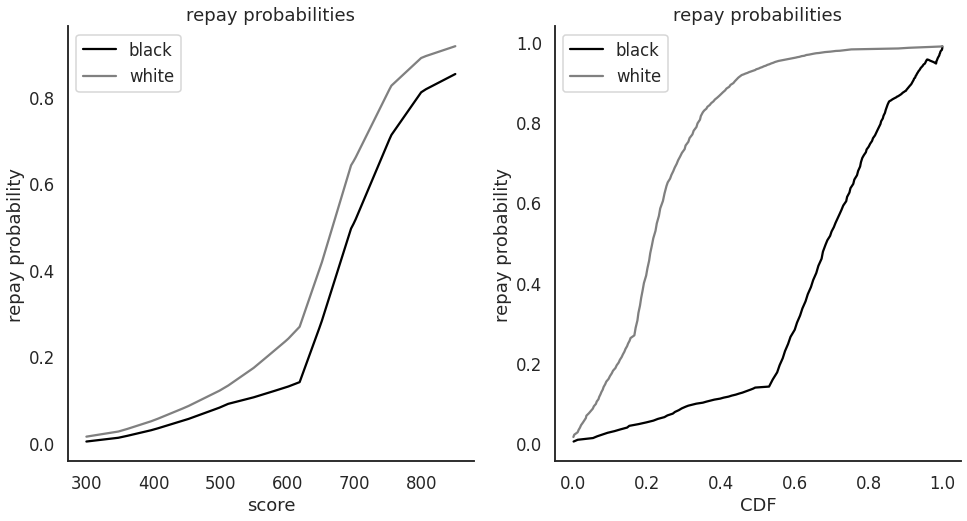

In [19]:
# plot the repay probabilities
fig, ax = plt.subplots(1,2,figsize=(16,8)); 

ax[0].plot(scores_list,repay_A,color='black',label='black')
ax[0].plot(scores_list,repay_B,label='white',color="grey")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("repay probabilities")
ax[0].set_xlabel("score")
ax[0].set_ylabel("repay probability")
ax[0].legend()

ax[1].plot(cdf_A,repay_A,color='black',label='black')
ax[1].plot(cdf_B,repay_B,label='white',color="grey")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title("repay probabilities")
ax[1].set_xlabel("CDF")
ax[1].set_ylabel("repay probability")
ax[1].legend()


# 2. Compute thresholds and visualize on group CDFs

In [20]:
threshes = []
for utils in util_repay:
    '''print('curr utils')
    print(utils)
    print('loan repaid probs')
    print(loan_repaid_probs)
    print('pis')
    print(pis)
    print('group_size_ratio')
    print(group_size_ratio)
    print('impact')
    print(impact)
    print('scores_list')
    print(scores_list)'''
    # TODO: see if the error below is caused by the NONE values in score list?? 
    threshes.append(dlo.get_thresholds(loan_repaid_probs, pis, group_size_ratio,
                                                utils, impact, scores_list))

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# plot the threshes
fig, ax = plt.subplots(1,len(threshes),figsize=(16,8)); 
plt.title("")
for i,thresh in enumerate(threshes):
    # unpack
    threshes_DP, threshes_EO, threshes_MP, threshes_downward = thresh
    ax[i].plot(scores, 1 - cdf_A, label='black',color="black"); 
    ax[i].plot(scores,1 - cdf_B, label='white',color="grey",alpha=0.4); 
    
    ax[i].set_xlabel("score")
    ax[i].axvline(threshes_downward[0],LineStyle='-', color='yellow',label="thresh-active-harm A")
    ax[i].axvline(threshes_MP[0],LineStyle='-', color='orange',label="MP A")
    ax[i].axvline(threshes_DP[0],LineStyle='-', color='cyan',label="DP A")
    ax[i].axvline(threshes_EO[0],LineStyle='-', color='purple',label="EO A")
    ax[i].set_title("[u-,u+] = {0}".format(util_repay[i]))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_ylim([0,1])
    ax[i].set_xlim([300,850])

    plt.suptitle("Thresholds under different institution utility ratios (u-/u+)")
    
ax[0].set_ylabel("Fraction of group above")
plt.legend(loc='lower left')


# Plot utility and outcome curves

In [ ]:
# get outcome curves

outcome_curveA = dlo.get_outcome_curve(loan_repaid_probs[0],pis[0],scores,impact)
outcome_curveB = dlo.get_outcome_curve(loan_repaid_probs[1],pis[1],scores,impact)

rate_index_A = list(reversed(1- cdf_A))
rate_index_B = list(reversed(1- cdf_B))

In [ ]:
# get utility curves
utility_curves = dlo.get_utility_curve(loan_repaid_probs,pis, scores,utils=util_repay[0])
util_MP = np.amax(utility_curves, axis=1)

utility_curves_MP = np.vstack([utility_curves[0] + util_MP[1], utility_curves[1]+ util_MP[0]])
utility_curves_DP = dlo.get_utility_curves_dempar(utility_curves,np.vstack([cdf_A, cdf_B]),group_size_ratio, scores)
utility_curves_EO = dlo.get_utility_curves_eqopp(utility_curves,loan_repaid_probs,pis,group_size_ratio, scores)

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,16)); 

for i in range(2):
    for j in range(2):
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].axhline(0,LineStyle='-', color='grey',alpha=0.4)
        
ax[0,0].plot(rate_index_A,outcome_curveA,color='black')
ax[0,0].set_xlabel('selection rate');
ax[0,0].set_ylabel('expected score change')
ax[0,0].set_title('Black'); 
ax[0,0].set_ylim([-70,50])
ax[0,0].set_xlim([0,1])

ax[0,1].plot(rate_index_B,outcome_curveB,color='black')
ax[0,1].set_xlabel('selection rate')
ax[0,1].set_title('White') 
ax[0,1].set_ylim([-70,50])
ax[0,1].set_xlim([0,1])

ax[1,0].plot(rate_index_A, utility_curves_MP[0], label='MP'); 
ax[1,0].plot(rate_index_A, utility_curves_DP[0], label='DP'); 
ax[1,0].plot(rate_index_A, utility_curves_EO[0], label='EO'); 
ax[1,0].set_xlabel('selection rate')
ax[1,0].set_ylabel('expected profit')
ax[1,0].set_ylim([-1,1])
ax[1,0].legend()
ax[1,0].set_xlim([0,1])

ax[1,1].plot(rate_index_B, utility_curves_MP[1], label='MP'); 
ax[1,1].plot(rate_index_B, utility_curves_DP[1], label='DP'); 
ax[1,1].plot(rate_index_B, utility_curves_EO[1], label='EO'); 
ax[1,1].set_xlabel('selection rate')
ax[1,1].set_ylabel('expected profit')
ax[1,1].set_ylim([-1,1])
ax[1,1].legend()
ax[1,1].set_xlim([0,1])
plt.suptitle("")
